In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Boston Housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Exploratory Data Analysis
Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's of dollars
    
Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute (CHAS).

Missing Attribute Values:  None.

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         4
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

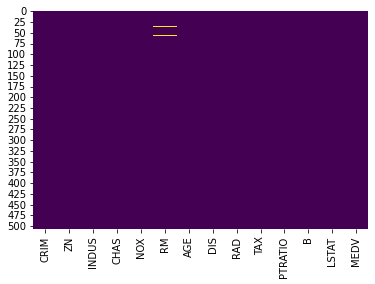

In [6]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

C:\Users\disha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

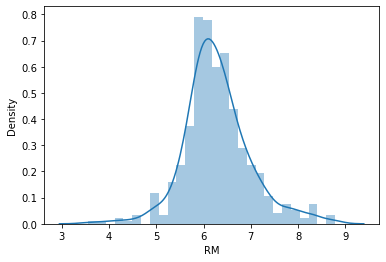

In [7]:
sns.distplot(df.RM)

In [8]:
df['RM'] = df['RM'].fillna(df['RM'].median())

<AxesSubplot:>

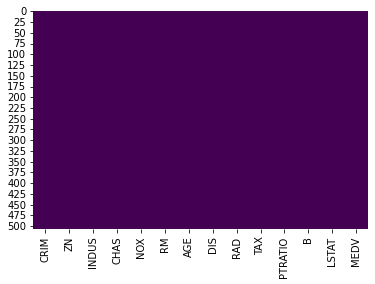

In [9]:
sns.heatmap(df.isna(),cbar=False, cmap='viridis')

## Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

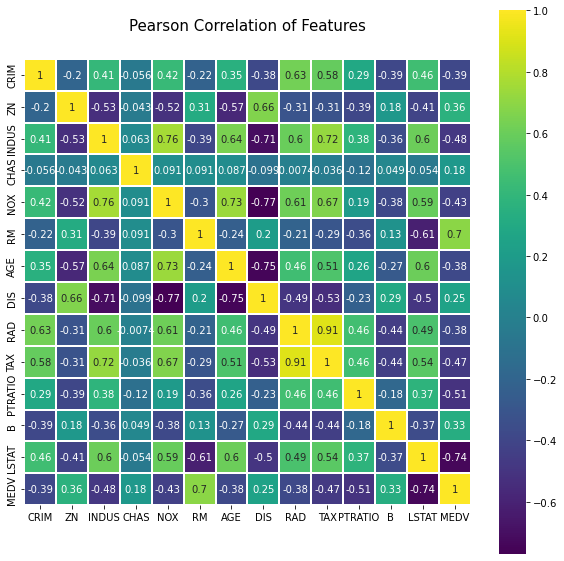

In [10]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
X = df.drop(['MEDV'],axis=1)
y = np.round(df['MEDV'])

In [13]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [14]:
print(*zip(X.columns ,fit.scores_))

('CRIM', 5503.817133485196) ('ZN', 5937.859413747864) ('INDUS', 873.7462696263372) ('CHAS', 59.08017032992059) ('NOX', 5.073298557569966) ('RM', 21.922329783956137) ('AGE', 2424.3089368230526) ('DIS', 163.91942598964144) ('RAD', 1445.2576467957658) ('TAX', 14817.836927399674) ('PTRATIO', 45.69258702334418) ('B', 3340.486411693183) ('LSTAT', 1430.549632328826)


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [16]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [17]:
print(model.feature_importances_)

[0.1167975  0.02250973 0.03980861 0.01330447 0.06741313 0.14033213
 0.12268233 0.10664006 0.03548805 0.04440231 0.04476133 0.10782731
 0.13803305]


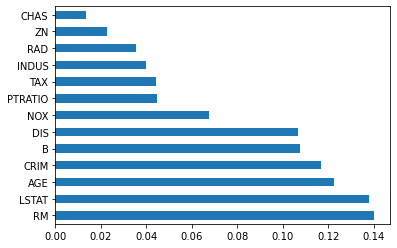

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [19]:
sel_features = feat_importances.nlargest(13).index

In [20]:
sel_features

Index(['RM', 'LSTAT', 'AGE', 'CRIM', 'B', 'DIS', 'NOX', 'PTRATIO', 'TAX',
       'INDUS', 'RAD', 'ZN', 'CHAS'],
      dtype='object')

In [21]:
features = df[sel_features]

In [22]:
y = df['MEDV']

In [23]:
features

,RM,LSTAT,AGE,CRIM,B,DIS,NOX,PTRATIO,TAX,INDUS,RAD,ZN,CHAS
0,6.575,4.98,65.2,0.00632,396.90,4.0900,0.538,15.3,296,2.31,1,18.0,0
1,6.421,9.14,78.9,0.02731,396.90,4.9671,0.469,17.8,242,7.07,2,0.0,0
2,7.185,4.03,61.1,0.02729,392.83,4.9671,0.469,17.8,242,7.07,2,0.0,0
3,6.998,2.94,45.8,0.03237,394.63,6.0622,0.458,18.7,222,2.18,3,0.0,0
4,7.147,5.33,54.2,0.06905,396.90,6.0622,0.458,18.7,222,2.18,3,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6.593,9.67,69.1,0.06263,391.99,2.4786,0.573,21.0,273,11.93,1,0.0,0
502,6.120,9.08,76.7,0.04527,396.90,2.2875,0.573,21.0,273,11.93,1,0.0,0
503,6.976,5.64,91.0,0.06076,396.90,2.1675,0.573,21.0,273,11.93,1,0.0,0
504,6.794,6.48,89.3,0.10959,393.45,2.3889,0.573,21.0,273,11.93,1,0.0,0


## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(404, 13)

In [26]:
x_test.shape

(102, 13)

In [27]:
y_test.shape

(102,)

In [28]:
y_train.shape

(404,)

# Model Selection

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model_lin = LinearRegression()

In [31]:
model_lin.fit(x_train,y_train)

LinearRegression()

In [32]:
print("Training Accuracy:", model_lin.score(x_train,y_train))

Training Accuracy: 0.7504599482017843


In [33]:
print("Testing Accuracy:", model_lin.score(x_test,y_test))

Testing Accuracy: 0.669298887228401


## Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
model_reg = RandomForestRegressor()

In [36]:
model_reg.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
print("Training Accuracy:", model_reg.score(x_train,y_train))

Training Accuracy: 0.9792707583650615


In [38]:
print("Testing Accuracy:", model_reg.score(x_test,y_test))

Testing Accuracy: 0.8825605722456249
